In [1]:
# importing all the required libraries

from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [2]:
def gen_logistic(x, w=1, b=0):
    """
    outputing the logistic output for an input x
    :param x: scalar or numpy array of shape (n_samples, n_features). If only one feature, it must have the shape of (n_samples,1).
    :param w: weight(s); either scalar or numpy array of shape (1, n_features)
    :param b: bias; either scalar or numpy array of shape (1,)
    returns y of shape (n_samples,)
    """    
    
    y =0 
    if np.isscalar(x):
      x = np.array(x).reshape((1,1))
    if np.isscalar(w):
      w = np.array(w).reshape((1,1))
    if np.isscalar(b):
      b = np.array(b).reshape((1,1))  
    if b.shape==(1,):
      b= b.reshape((1,1))  
      
    # Compute z = x * w + b
    z = np.dot(x, w.T) + b

    # Compute the sigmoid function
    y = 1 / (1 + np.exp(-z))
    
    print(y.reshape(y.shape[0],))
    return y.reshape(y.shape[0],)

[2.06115362e-09 2.35618809e-09 2.69345394e-09 3.07899617e-09
 3.51972510e-09 4.02354017e-09 4.59947156e-09 5.25784203e-09
 6.01045195e-09 6.87079079e-09 7.85427894e-09 8.97854403e-09
 1.02637369e-08 1.17328929e-08 1.34123446e-08 1.53321938e-08
 1.75268510e-08 2.00356524e-08 2.29035649e-08 2.61819916e-08
 2.99296938e-08 3.42138438e-08 3.91112289e-08 4.47096280e-08
 5.11093843e-08 5.84252047e-08 6.67882148e-08 7.63483098e-08
 8.72768411e-08 9.97696870e-08 1.14050764e-07 1.30376041e-07
 1.49038125e-07 1.70371507e-07 1.94758558e-07 2.22636381e-07
 2.54504647e-07 2.90934548e-07 3.32579039e-07 3.80184538e-07
 4.34604304e-07 4.96813733e-07 5.67927839e-07 6.49221238e-07
 7.42150995e-07 8.48382740e-07 9.69820518e-07 1.10864092e-06
 1.26733209e-06 1.44873832e-06 1.65611105e-06 1.89316710e-06
 2.16415532e-06 2.47393274e-06 2.82805161e-06 3.23285891e-06
 3.69561011e-06 4.22459920e-06 4.82930736e-06 5.52057282e-06
 6.31078516e-06 7.21410733e-06 8.24672946e-06 9.42715898e-06
 1.07765523e-05 1.231909

Text(0.5, 1.0, 'Logistic/Sigmoid Function')

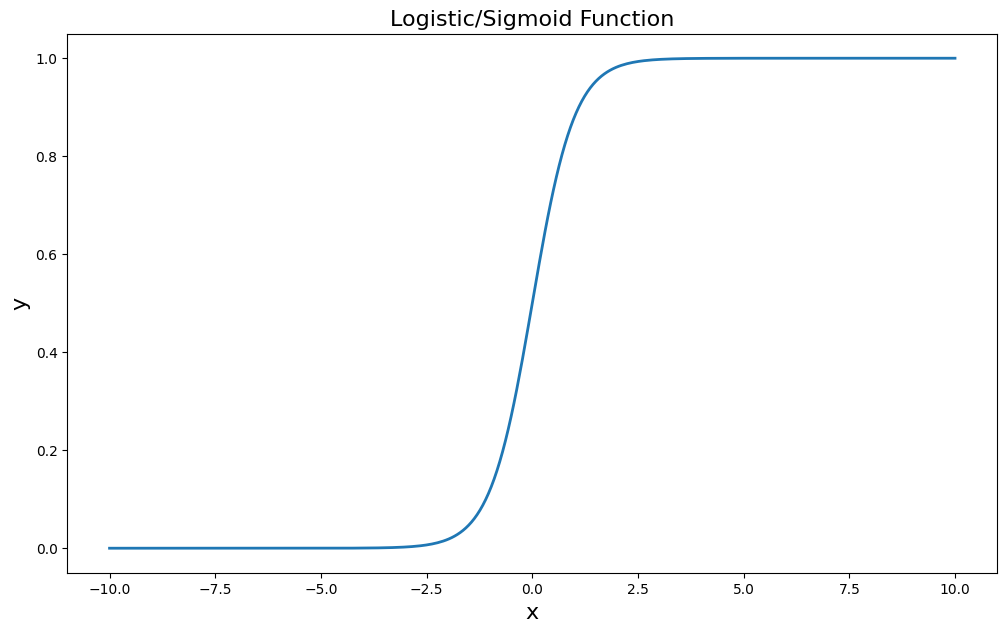

In [3]:
N = 300
Xa = -10
Xb = 10
w = 2
b = 0

x = np.expand_dims(np.linspace(Xa,Xb,N), axis=1)
y = gen_logistic(x, w, b)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(x,y, lw=2)
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_title("Logistic/Sigmoid Function", fontsize=16)


In [4]:
# Importing the breast-cancer dataset from sklearn datasets

class BC_data:
    """
    class to import the breast cancer dataset from sklearn
    
    """
    def __init__(self):
        
        x, y = load_breast_cancer(return_X_y= True)
        self.x_train = None 
        self.x_test = None 
        self.y_train = None 
        self.y_test = None
        
        # Split the data into training and test data (use train_test_split sklearn) 
        
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.25, random_state=5)
        
        
        
data = BC_data()

In [5]:
# Building the logistic regression model

# Use the Logistic Regression function from Sklearn library
LogReg = LogisticRegression(solver='liblinear').fit(data.x_train, data.y_train)

# weights 
LogReg.coef_

array([[ 1.89038896e+00,  1.44257903e-01, -9.89409947e-02,
        -1.05647611e-03, -1.35380881e-01, -3.30535162e-01,
        -5.77087797e-01, -3.16468410e-01, -1.83377189e-01,
        -1.23116151e-02,  4.00766065e-02,  1.62223912e+00,
         1.16247932e-01, -9.78890370e-02, -1.76864906e-02,
         2.66271163e-02, -4.95304414e-02, -3.75449037e-02,
        -2.78535535e-02,  8.50077686e-03,  1.51681488e+00,
        -4.03270840e-01, -1.05906252e-01, -2.52491142e-02,
        -2.56986381e-01, -8.29175931e-01, -1.37990538e+00,
        -5.82245999e-01, -5.70040298e-01, -8.29516126e-02]])

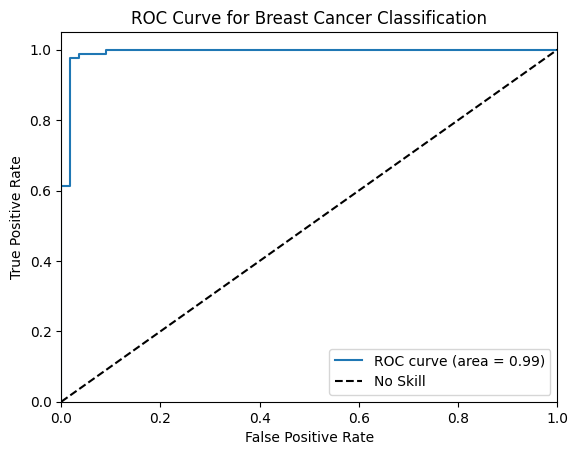

In [6]:
from sklearn.metrics import auc

# Predict probabilities on the test set
y_pred_proba = LogReg.predict_proba(data.x_test)[:, 1] 

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(data.y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()


In [7]:
def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates precision for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    truePos = 0
    FalsePos = 0
    for i in range(len(y_true)):
        if y_true[i] and y_pred[i] == 1:
            truePos += 1
        if y_true[i] < y_pred[i]:
            FalsePos += 1

    precision = truePos/(truePos + FalsePos)
    
    return precision

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates recall for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    truePos = 0
    FalseNeg = 0
    for i in range(len(y_true)):
        if y_true[i] and y_pred[i] == 1:
            truePos += 1
        if y_true[i] > y_pred[i]:
            FalseNeg += 1

    recall = truePos/(truePos + FalseNeg)
    
    return recall

In [8]:
# Sample Test cell 
ut_true = np.array([1.0, 1.0, 0.0, 1.0, 1.0, 0.0])
ut_pred = np.array([1.0, 1.0, 1.0, 1.0, 0.0, 1.0])
prec = calculate_precision(ut_true, ut_pred, 1.0)
recall = calculate_recall(ut_true, ut_pred, 1.0)
print(prec, recall)
assert prec == 0.6, "Check the precision value returned from your calculate_precision function."
assert recall == 0.75, "Check the recall value returned from your calculate_recall function."

0.6 0.75


In [11]:
# generate the predictions for the test data data.x_test and compute prediction and recall metrics by calling the functions built above



# Generate predicted y values using coefficients of the fit logistic regression model for data.x_test
# Then compute and print the precision and recall metrics 
y_pred = LogReg.predict(data.x_test)


precision = calculate_precision(data.y_test, y_pred)
recall = calculate_recall(data.y_test, y_pred)



print('Model Precision : %0.2f' % precision)
print('Model Recall : %0.2f' % recall)


Model Precision : 0.98
Model Recall : 0.99
